In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('oversampled_CICIDS2017_Wed.csv')
df2 = df1.groupby([' Timestamp'])[' Flow Duration'].count()
df2 = pd.DataFrame(df2).reset_index()
df2.columns=[' Timestamp','BiFlowsCount']
df = df1.merge(df2, left_on=' Timestamp', right_on=' Timestamp')
df = df.sort_values(' Timestamp')
df

C:\Users\kdagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,target,BiFlowsCount
533819,52770,192.168.10.3-192.168.10.15-53-58098-17,192.168.10.15,58098,192.168.10.3,53,17,5/7/2017 10:00,181186,4,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1554
533949,65256,192.168.10.1-192.168.10.3-53-60930-17,192.168.10.3,60930,192.168.10.1,53,17,5/7/2017 10:00,59693,1,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1554
533948,600244,192.168.10.3-192.168.10.9-53-57312-17,192.168.10.9,57312,192.168.10.3,53,17,5/7/2017 10:00,280632,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1554
533947,50849,172.16.0.1-192.168.10.50-54178-80-6,172.16.0.1,54178,192.168.10.50,80,6,5/7/2017 10:00,118013760,2,...,0.000000e+00,87.0,87.0,1.180000e+08,0.000000e+00,118000000.0,118000000.0,DoS slowloris,1,1554
533946,52813,172.16.0.1-192.168.10.50-58374-80-6,172.16.0.1,58374,192.168.10.50,80,6,5/7/2017 10:00,3002965,3,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,DoS slowloris,1,1554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602730,34148,192.168.10.14-104.88.37.207-50860-443-6,104.88.37.207,443,192.168.10.14,50860,6,5/7/2017 9:59,49,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1175
602729,40899,192.168.10.3-192.168.10.5-123-123-17,192.168.10.5,123,192.168.10.3,123,17,5/7/2017 9:59,164,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1175
602728,50836,172.16.0.1-192.168.10.50-58272-80-6,172.16.0.1,58272,192.168.10.50,80,6,5/7/2017 9:59,102589615,14,...,4.535367e+06,6414542.0,565.0,1.920000e+07,1.880000e+07,51300000.0,5772658.0,DoS slowloris,1,1175
602744,34158,192.168.10.9-74.125.22.157-15619-443-6,192.168.10.9,15619,74.125.22.157,443,6,5/7/2017 9:59,5141382,5,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,0,1175


In [3]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [4]:
df[" Label"].value_counts()

BENIGN              399919
DoS Hulk            366005
DoS GoldenEye        16215
DoS slowloris         9253
DoS Slowhttptest      8589
Heartbleed              19
Name:  Label, dtype: int64

In [8]:
#del df['Unnamed: 0']
del df['target']

In [9]:
features = ['Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', 'BiFlowsCount']

In [10]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
#X[features]

C:\Users\kdagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
def targetify(s):
    if s == 'BENIGN':
        return 0
    else:
        return 1

In [12]:
df['Target']=df[' Label'].apply(targetify)

In [13]:
 y = df['Target']

In [14]:
X = X.fillna(0)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(640000, 85) (640000,)
(160000, 85) (160000,)


In [16]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2) #changed from (n_estimators=200, random_state=0)

In [17]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [18]:
importances = forest.feature_importances_

In [19]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [20]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 84: BiFlowsCount (0.188647)
2. feature 5:  Protocol (0.048862)
3. feature 53:  ACK Flag Count (0.043952)
4. feature 80: Idle Mean (0.038652)
5. feature 18:  Bwd Packet Length Mean (0.038235)
6. feature 24:  Flow IAT Max (0.035835)
7. feature 4:  Destination Port (0.034091)
8. feature 60:  Avg Bwd Segment Size (0.032847)
9. feature 47:  Packet Length Std (0.028675)
10. feature 82:  Idle Max (0.026689)
11. feature 58:  Average Packet Size (0.026118)
12. feature 46:  Packet Length Mean (0.025352)
13. feature 29:  Fwd IAT Max (0.024894)
14. feature 2:  Source Port (0.023740)
15. feature 75:  min_seg_size_forward (0.022978)
16. feature 19:  Bwd Packet Length Std (0.020639)
17. feature 44:  Min Packet Length (0.019906)
18. feature 54:  URG Flag Count (0.017150)
19. feature 16: Bwd Packet Length Max (0.016586)
20. feature 28:  Fwd IAT Std (0.016584)
21. feature 42: Fwd Packets/s (0.016336)
22. feature 26: Fwd IAT Total (0.015291)
23. feature 45:  Max Packet Length 

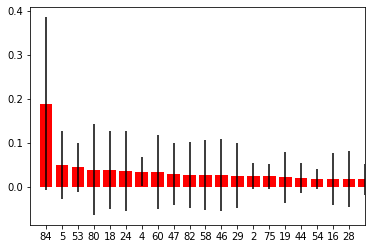

In [21]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

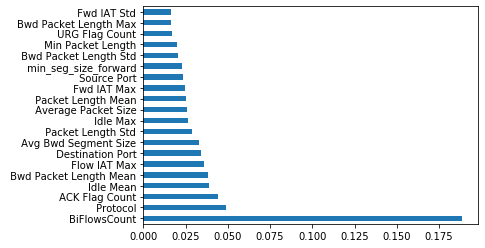

In [22]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")